## import library and load Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('Mall_Customers.csv')

print(f"sapmle : {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print(f"\n Column names:\n{df.columns.tolist()}")
print(f"Missing values: {df.isnull().sum()}")
print(f"Data type: {df.dtypes}")

sapmle : 200
Number of features: 5

 Column names:
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Missing values: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Data type: CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


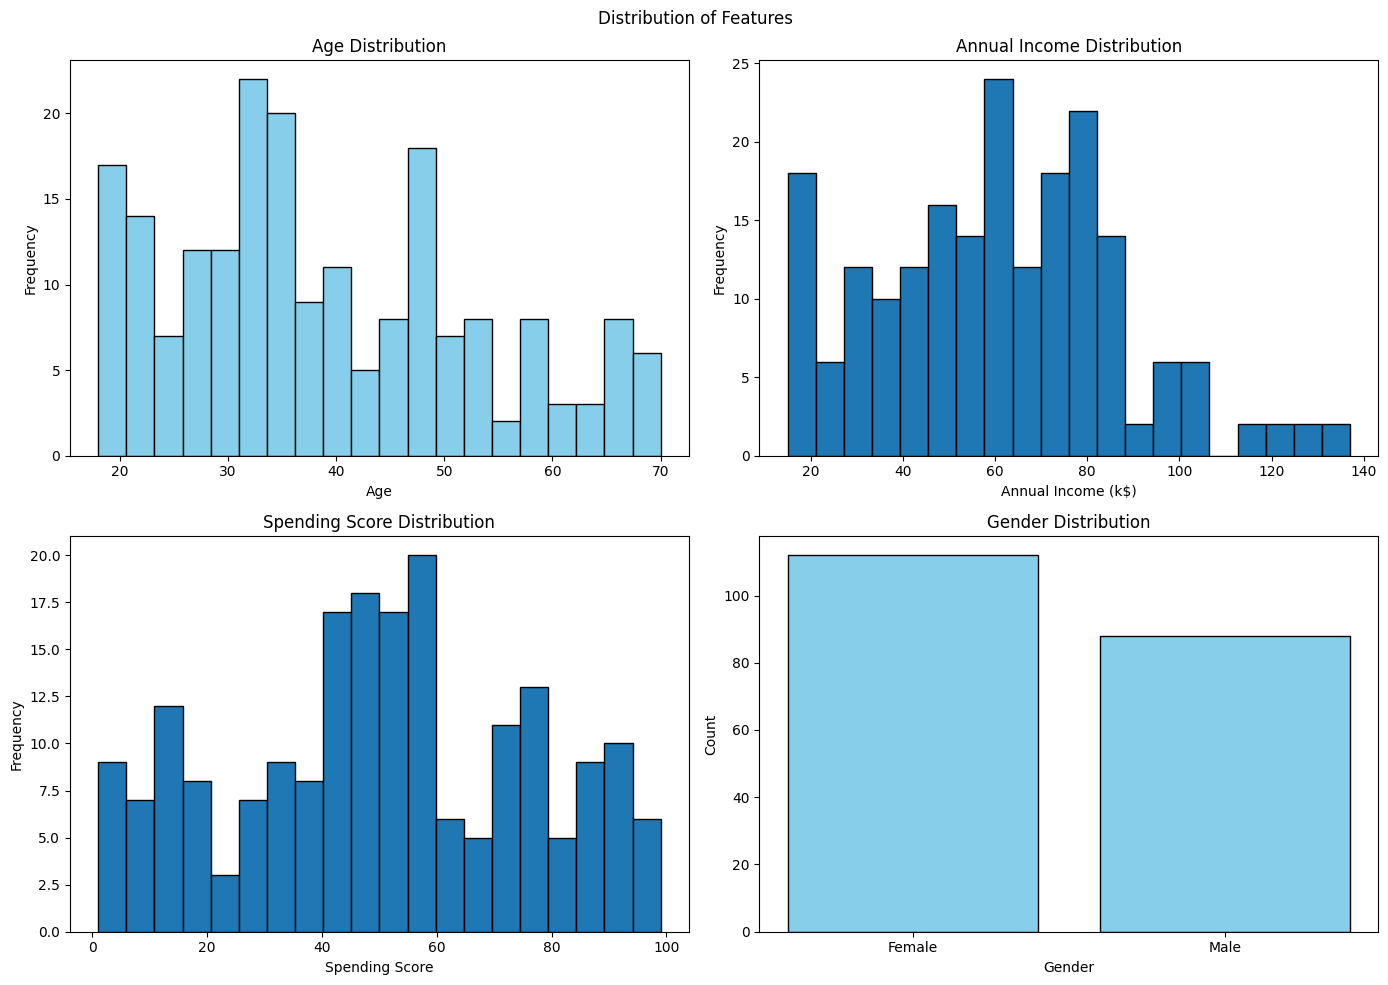

In [29]:
# Show data distribution
fig, axes = plt.subplots(2,2, figsize=(14,10))
fig.suptitle('Distribution of Features')

# Age
axes[0, 0].hist(df['Age'], bins=20, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Annual Income
axes[0, 1].hist(df['Annual Income (k$)'], bins=20, edgecolor='black')
axes[0, 1].set_title('Annual Income Distribution')
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Frequency')

# Spending Score
axes[1, 0].hist(df['Spending Score (1-100)'], bins=20, edgecolor='black')
axes[1, 0].set_title('Spending Score Distribution')
axes[1, 0].set_xlabel('Spending Score')
axes[1, 0].set_ylabel('Frequency')

# Gender
gender_counts = df['Gender'].value_counts()
axes[1, 1].bar(gender_counts.index, gender_counts.values, edgecolor='black', color='skyblue')
axes[1, 1].set_title('Gender Distribution')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('data_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Preprocessing and PCA

In [30]:
# Convert Gender to number
df['Gender_encoded'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Select numerical features for clustering
features = ['Gender_encoded', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

# StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply 2D PCA
pca = PCA(n_components=2, random_state=33)
X_pca = pca.fit_transform(X_scaled)

print(f" Proportion of variance explained by PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f" Proportion of variance explained by PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f" Total variance retained: {pca.explained_variance_ratio_.sum():.4f}")

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

 Proportion of variance explained by PC1: 0.3369
 Proportion of variance explained by PC2: 0.2623
 Total variance retained: 0.5992


### Display data in PCA space

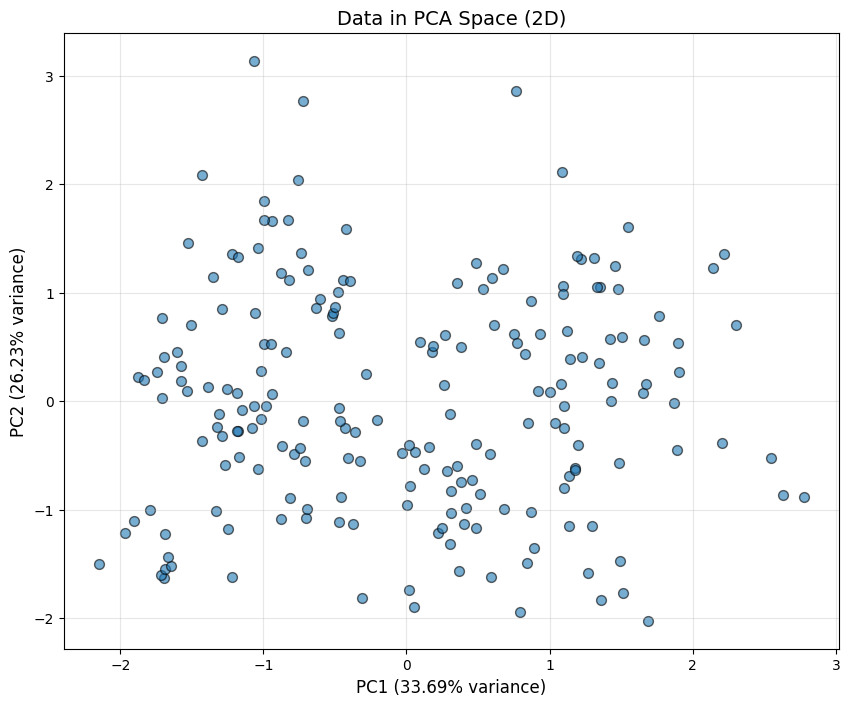

In [31]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=50, edgecolors='k')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('Data in PCA Space (2D)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.savefig('pca_original.png', dpi=300, bbox_inches='tight')
plt.show()

## KMeans and evaluation

In [32]:
# k list
k_values = range(2, 11)
inertias = []
silhouettes = []

In [33]:
# Train KMeans for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=33, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_scaled, labels)
    
    inertias.append(inertia)
    silhouettes.append(silhouette)
    
    print(f"K={k:2d} | Inertia: {inertia:8.2f} | Silhouette: {silhouette:.4f}")

best_k_idx = np.argmax(silhouettes)
best_k = list(k_values)[best_k_idx]
print(f"\nBest K based on silhouette: {best_k} (Silhouette = {silhouettes[best_k_idx]:.4f})")

K= 2 | Inertia:   588.80 | Silhouette: 0.2518
K= 3 | Inertia:   476.86 | Silhouette: 0.2619
K= 4 | Inertia:   386.71 | Silhouette: 0.3016
K= 5 | Inertia:   326.42 | Silhouette: 0.3161
K= 6 | Inertia:   275.15 | Silhouette: 0.3248
K= 7 | Inertia:   236.81 | Silhouette: 0.3558
K= 8 | Inertia:   199.78 | Silhouette: 0.3873
K= 9 | Inertia:   174.25 | Silhouette: 0.4024
K=10 | Inertia:   152.03 | Silhouette: 0.4208

Best K based on silhouette: 10 (Silhouette = 0.4208)


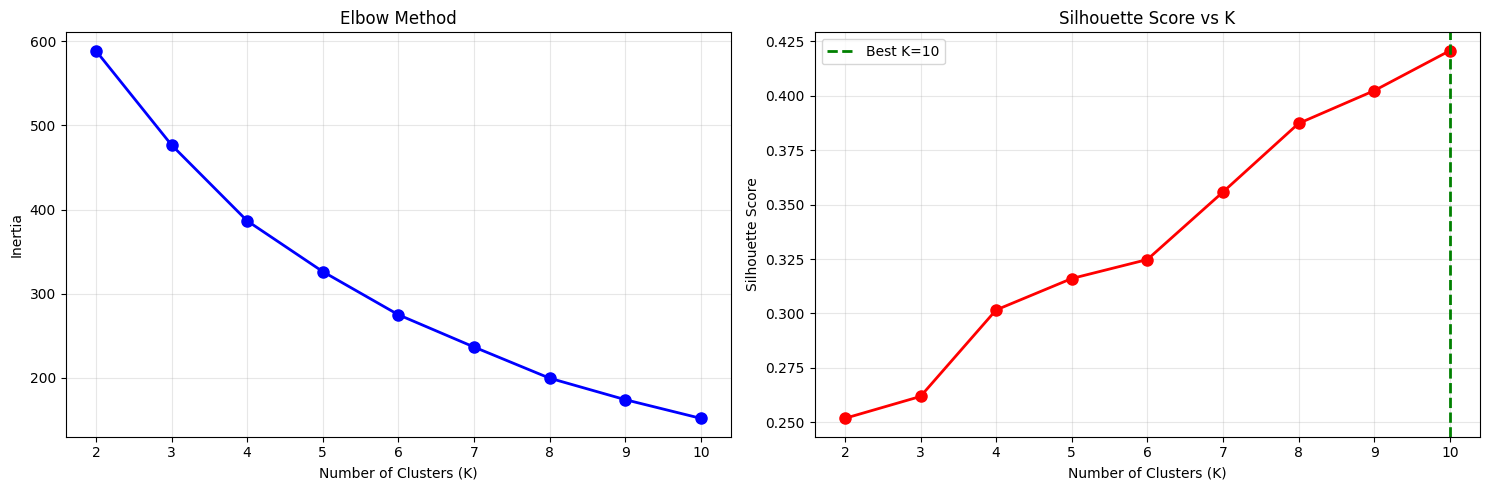

In [34]:
# Elbow and Silhouette Chart
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Elbow Method
axes[0].plot(k_values, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_values)

# Silhouette Score
axes[1].plot(k_values, silhouettes, 'ro-', linewidth=2, markersize=8)
axes[1].axvline(x=best_k, color='green', linestyle='--', linewidth=2, label=f'Best K={best_k}')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score vs K')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_values)
axes[1].legend()

plt.tight_layout()
plt.savefig('kmeans_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

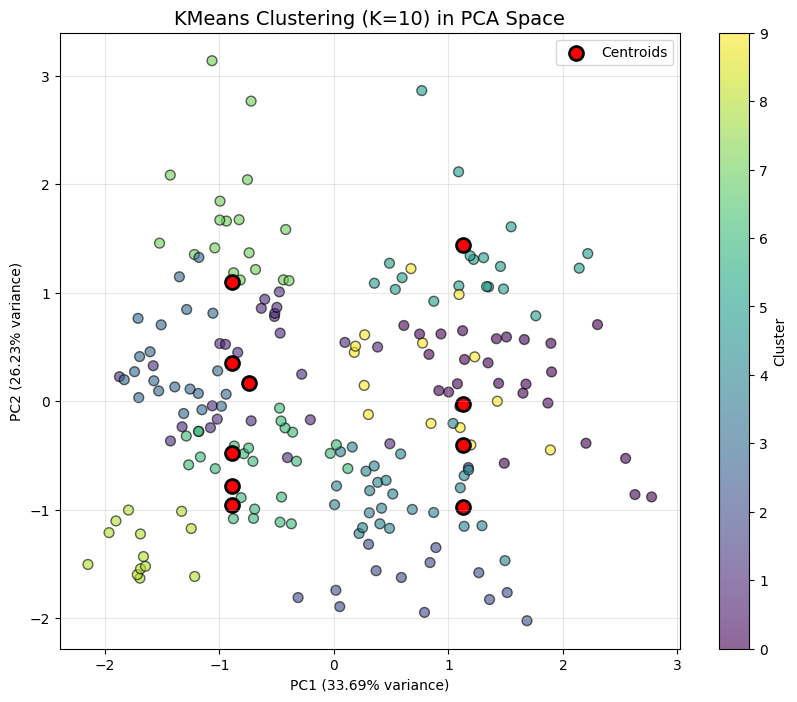

In [39]:
# نمایش نتایج KMeans با بهترین K
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_best = kmeans_best.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_best, 
                     cmap='viridis', alpha=0.6, s=50, edgecolor='k')
plt.scatter(kmeans_best.cluster_centers_[:, 0], kmeans_best.cluster_centers_[:, 1],
           c='red', marker='o', s=100, edgecolor='black', linewidth=2, label='Centroids')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title(f'KMeans Clustering (K={best_k}) in PCA Space', fontsize=14)
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('kmeans_best_pca.png', dpi=300, bbox_inches='tight')
plt.show()
